In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df1=pd.read_csv("titanic.csv")
df2=pd.read_csv("titanictest.csv")

In [28]:
df1["type"]="train"
df2["type"]="test"
df=pd.concat([df1,df2],ignore_index=True)

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
df.drop(["PassengerId","Ticket"],axis=1,inplace = True)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
type        1309 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


In [31]:
df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
type           0
dtype: int64

In [32]:
names=list(df["Name"])
for i in range(len(names)):
    names[i]=names[i].split(",")[1]
    names[i]=names[i].split(".")[0]
df["Name"]=names
df["Name"].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Dr                8
 Rev               8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 the Countess      1
 Mme               1
 Dona              1
 Jonkheer          1
 Don               1
 Capt              1
 Sir               1
 Lady              1
Name: Name, dtype: int64

In [33]:
df["Name"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [34]:
df.loc[(df["Name"]==" the Countess")|
        (df["Name"]==" Sir")|
        (df["Name"]==" Mme")|
        (df["Name"]==" Jonkheer")|
        (df["Name"]==" Don")|
        (df["Name"]==" Dona"),"Name"]=0
df.loc[df["Name"]==" Mr","Name"]=1
df.loc[df["Name"]==" Miss","Name"]=2
df.loc[df["Name"]==" Mrs","Name"]=3
df.loc[df["Name"]==" Master","Name"]=4
df.loc[df["Name"]==" Dr","Name"]=5
df.loc[df["Name"]==" Rev","Name"]=6
df.loc[(df["Name"]==" Major")|
        (df["Name"]==" Mlle")|
        (df["Name"]==" Col")|
        (df["Name"]==" Capt"),"Name"]=7
df.loc[(df["Name"]==" Lady")|
        (df["Name"]==" Ms"),"Name"]=8 

In [12]:
#Visualize no. of survivors based on their names

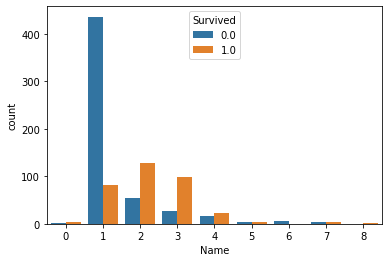

In [35]:
sns.countplot(x="Name",hue="Survived",data=df)

In [36]:
df["Cabin"].fillna(value="Z",inplace=True)
df["Cabin"].value_counts()

Z                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
C22 C26               4
F4                    4
F33                   4
B96 B98               4
F2                    4
C78                   4
E101                  3
B51 B53 B55           3
C101                  3
A34                   3
E34                   3
B58 B60               3
C65                   2
C116                  2
D28                   2
D20                   2
C2                    2
C93                   2
C83                   2
E67                   2
B22                   2
D26                   2
B77                   2
C68                   2
E24                   2
                   ... 
F                     1
B11                   1
A16                   1
E10                   1
A32                   1
B24                   1
D11                   1
F E57                 1
B37                   1
C90                   1
E77             

In [37]:
#Assemble 'Cabin' based on their initial alphabet.
for i in range(len(df["Cabin"])):
    df["Cabin"][i]=df["Cabin"][i][0]

C:\Users\Admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


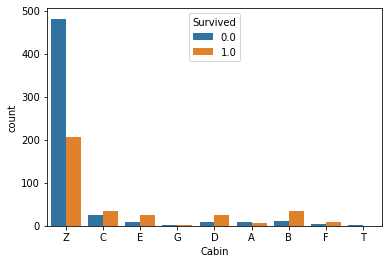

In [38]:
sns.countplot(x="Cabin",hue="Survived",data=df)

In [39]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Cabin'] = LE.fit_transform(df['Cabin'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       1309 non-null int32
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null int64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
type        1309 non-null object
dtypes: float64(3), int32(1), int64(4), object(3)
memory usage: 107.5+ KB


In [41]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

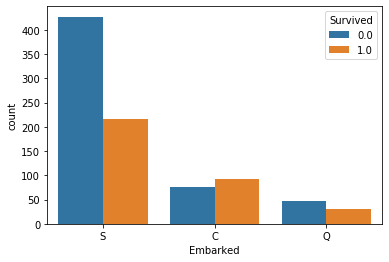

In [49]:
sns.countplot(x="Embarked",hue="Survived",data=df)

In [50]:
#Using sklearn to fill missing values.
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
si=si.fit(df[["Embarked"]])
df[["Embarked"]]=si.transform(df[["Embarked"]])
df['Embarked'] = LE.fit_transform(df['Embarked'])
        

si=SimpleImputer(missing_values=np.nan,strategy="median")
si=si.fit(df[["Age"]])
df[["Age"]]=si.transform(df[["Age"]])
df["Age"]=df["Age"].astype(np.float64)

In [51]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

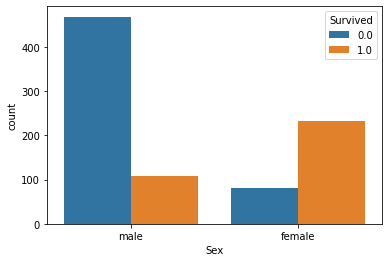

In [52]:
sns.countplot(x="Sex",hue="Survived",data=df)

In [53]:
df.loc[df["Sex"]=="male","Sex"]=0
df.loc[df["Sex"]=="female","Sex"]=1

In [54]:
df["Fare"].fillna(value=df["Fare"].mean(),inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Age         1309 non-null float64
Cabin       1309 non-null int32
Embarked    1309 non-null int32
Fare        1309 non-null float64
Name        1309 non-null int64
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
type        1309 non-null object
dtypes: float64(3), int32(2), int64(5), object(1)
memory usage: 102.3+ KB


In [57]:
#Separate train and test data based on the label "type"
X_train=df.loc[:890,df.columns!="Survived"] 
X_train.drop("type",axis=1,inplace=True) 

X_test=df.loc[891:1308,df.columns!="Survived"]
X_test.drop("type",axis=1,inplace=True)    
y_train=df.loc[:890,"Survived"]        
y_test=df.loc[891:1308,"Survived"]

In [58]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [59]:
# First checking accuracy using SVM 
from sklearn.svm import SVC
classifier_svm=SVC(kernel='rbf',random_state=0)

In [60]:
classifier_svm.fit(X_train,y_train)    

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [61]:
y_pred_svm=classifier_svm.predict(X_train)
y_pred_svm

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_train,y_pred_svm) 
cm

array([[495,  54],
       [ 84, 258]], dtype=int64)

In [85]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("Accuracy of the model is",accuracy*100,"%")

Accuracy of the model is 84.51178451178451 %


In [86]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [Errno 2] No such file or directory: 'c:\\users\\admin\\anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow-1.13.1.dist-info\\METADATA'



In [87]:
import keras

In [82]:
# Checking accuracy using Three layered Neural Network
from keras.models import Sequential
from keras.layers import Dense

In [83]:
classifier_nn=Sequential()
classifier_nn.add(Dense(units=5,kernel_initializer="uniform",activation="relu",input_dim=9))
classifier_nn.add(Dense(units=5,kernel_initializer="uniform",activation="relu"))
classifier_nn.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))

In [84]:
classifier_nn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [88]:
classifier_nn.fit(X_train,y_train,batch_size=10,epochs=1000)

Epoch 1/1000
891/891 [==============================] - 1s 1ms/step - loss: 0.6893 - acc: 0.6139
Epoch 2/1000
891/891 [==============================] - 0s 81us/step - loss: 0.6632 - acc: 0.6813
Epoch 3/1000
891/891 [==============================] - 0s 81us/step - loss: 0.5868 - acc: 0.7868
Epoch 4/1000
891/891 [==============================] - 0s 78us/step - loss: 0.5015 - acc: 0.8002
Epoch 5/1000
891/891 [==============================] - 0s 78us/step - loss: 0.4589 - acc: 0.8036
Epoch 6/1000
891/891 [==============================] - 0s 78us/step - loss: 0.4423 - acc: 0.8103
Epoch 7/1000
891/891 [==============================] - 0s 81us/step - loss: 0.4355 - acc: 0.8137
Epoch 8/1000
891/891 [==============================] - 0s 77us/step - loss: 0.4302 - acc: 0.8081
Epoch 9/1000
891/891 [==============================] - 0s 76us/step - loss: 0.4272 - acc: 0.8081
Epoch 10/1000
891/891 [==============================] - 0s 77us/step - loss: 0.4250 - acc: 0.8114
Epoch 11/1000
891/89

891/891 [==============================] - 0s 85us/step - loss: 0.3991 - acc: 0.8328
Epoch 84/1000
891/891 [==============================] - 0s 83us/step - loss: 0.3988 - acc: 0.8316
Epoch 85/1000
891/891 [==============================] - 0s 80us/step - loss: 0.3995 - acc: 0.8316
Epoch 86/1000
891/891 [==============================] - 0s 81us/step - loss: 0.4002 - acc: 0.8361
Epoch 87/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3983 - acc: 0.8328
Epoch 88/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3984 - acc: 0.8339
Epoch 89/1000
891/891 [==============================] - 0s 82us/step - loss: 0.3979 - acc: 0.8339
Epoch 90/1000
891/891 [==============================] - 0s 81us/step - loss: 0.3982 - acc: 0.8316
Epoch 91/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3979 - acc: 0.8361
Epoch 92/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3983 - acc: 0.8350
Epoch 93/1000
891/891 [=

891/891 [==============================] - 0s 86us/step - loss: 0.3905 - acc: 0.8406
Epoch 166/1000
891/891 [==============================] - 0s 83us/step - loss: 0.3913 - acc: 0.8418
Epoch 167/1000
891/891 [==============================] - 0s 83us/step - loss: 0.3910 - acc: 0.8373
Epoch 168/1000
891/891 [==============================] - 0s 82us/step - loss: 0.3906 - acc: 0.8395
Epoch 169/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3907 - acc: 0.8384
Epoch 170/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3902 - acc: 0.8406
Epoch 171/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3901 - acc: 0.8406
Epoch 172/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3898 - acc: 0.8418
Epoch 173/1000
891/891 [==============================] - 0s 84us/step - loss: 0.3897 - acc: 0.8418
Epoch 174/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3901 - acc: 0.8406
Epoch 175/1000


891/891 [==============================] - 0s 81us/step - loss: 0.3864 - acc: 0.8418
Epoch 248/1000
891/891 [==============================] - 0s 82us/step - loss: 0.3863 - acc: 0.8462
Epoch 249/1000
891/891 [==============================] - 0s 75us/step - loss: 0.3868 - acc: 0.8429
Epoch 250/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3866 - acc: 0.8429
Epoch 251/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3860 - acc: 0.8440
Epoch 252/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3861 - acc: 0.8395
Epoch 253/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3862 - acc: 0.8418
Epoch 254/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3858 - acc: 0.8440
Epoch 255/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3865 - acc: 0.8395
Epoch 256/1000
891/891 [==============================] - 0s 80us/step - loss: 0.3855 - acc: 0.8440
Epoch 257/1000


891/891 [==============================] - 0s 81us/step - loss: 0.3841 - acc: 0.8462
Epoch 330/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3846 - acc: 0.8451
Epoch 331/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3844 - acc: 0.8496
Epoch 332/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3837 - acc: 0.8418
Epoch 333/1000
891/891 [==============================] - 0s 81us/step - loss: 0.3845 - acc: 0.8429
Epoch 334/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3840 - acc: 0.8429
Epoch 335/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3840 - acc: 0.8440
Epoch 336/1000
891/891 [==============================] - 0s 76us/step - loss: 0.3846 - acc: 0.8451
Epoch 337/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3838 - acc: 0.8429
Epoch 338/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3841 - acc: 0.8451
Epoch 339/1000


891/891 [==============================] - 0s 81us/step - loss: 0.3825 - acc: 0.8462
Epoch 412/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3822 - acc: 0.8451
Epoch 413/1000
891/891 [==============================] - 0s 76us/step - loss: 0.3822 - acc: 0.8485
Epoch 414/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3817 - acc: 0.8451
Epoch 415/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3828 - acc: 0.8429
Epoch 416/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3817 - acc: 0.8429
Epoch 417/1000
891/891 [==============================] - 0s 76us/step - loss: 0.3818 - acc: 0.8462
Epoch 418/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3828 - acc: 0.8474
Epoch 419/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3819 - acc: 0.8462
Epoch 420/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3818 - acc: 0.8485
Epoch 421/1000


891/891 [==============================] - 0s 79us/step - loss: 0.3805 - acc: 0.8485
Epoch 494/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3802 - acc: 0.8496
Epoch 495/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3815 - acc: 0.8485
Epoch 496/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3801 - acc: 0.8462
Epoch 497/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3806 - acc: 0.8462
Epoch 498/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3807 - acc: 0.8462
Epoch 499/1000
891/891 [==============================] - 0s 79us/step - loss: 0.3798 - acc: 0.8519
Epoch 500/1000
891/891 [==============================] - 0s 78us/step - loss: 0.3806 - acc: 0.8485
Epoch 501/1000
891/891 [==============================] - 0s 77us/step - loss: 0.3801 - acc: 0.8496
Epoch 502/1000
891/891 [==============================] - 0s 76us/step - loss: 0.3800 - acc: 0.8496
Epoch 503/1000


891/891 [==============================] - 0s 88us/step - loss: 0.3792 - acc: 0.8485
Epoch 576/1000
891/891 [==============================] - 0s 88us/step - loss: 0.3795 - acc: 0.8440
Epoch 577/1000
891/891 [==============================] - 0s 91us/step - loss: 0.3798 - acc: 0.8485
Epoch 578/1000
891/891 [==============================] - 0s 88us/step - loss: 0.3793 - acc: 0.8485
Epoch 579/1000
891/891 [==============================] - 0s 93us/step - loss: 0.3792 - acc: 0.8474
Epoch 580/1000
891/891 [==============================] - 0s 91us/step - loss: 0.3800 - acc: 0.8507
Epoch 581/1000
891/891 [==============================] - 0s 90us/step - loss: 0.3793 - acc: 0.8496
Epoch 582/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3798 - acc: 0.8462
Epoch 583/1000
891/891 [==============================] - 0s 93us/step - loss: 0.3798 - acc: 0.8485
Epoch 584/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3802 - acc: 0.8451
Epoch 585/1000


891/891 [==============================] - 0s 120us/step - loss: 0.3780 - acc: 0.8496
Epoch 657/1000
891/891 [==============================] - 0s 123us/step - loss: 0.3781 - acc: 0.8485
Epoch 658/1000
891/891 [==============================] - 0s 129us/step - loss: 0.3776 - acc: 0.8485
Epoch 659/1000
891/891 [==============================] - 0s 126us/step - loss: 0.3778 - acc: 0.8496
Epoch 660/1000
891/891 [==============================] - 0s 118us/step - loss: 0.3778 - acc: 0.8496
Epoch 661/1000
891/891 [==============================] - 0s 125us/step - loss: 0.3780 - acc: 0.8496
Epoch 662/1000
891/891 [==============================] - 0s 125us/step - loss: 0.3780 - acc: 0.8485
Epoch 663/1000
891/891 [==============================] - 0s 115us/step - loss: 0.3780 - acc: 0.8474
Epoch 664/1000
891/891 [==============================] - 0s 130us/step - loss: 0.3780 - acc: 0.8485
Epoch 665/1000
891/891 [==============================] - 0s 100us/step - loss: 0.3779 - acc: 0.8474
Epoch

891/891 [==============================] - 0s 100us/step - loss: 0.3770 - acc: 0.8496
Epoch 738/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3768 - acc: 0.8462
Epoch 739/1000
891/891 [==============================] - 0s 97us/step - loss: 0.3771 - acc: 0.8519
Epoch 740/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3770 - acc: 0.8507
Epoch 741/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3768 - acc: 0.8474
Epoch 742/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3765 - acc: 0.8462
Epoch 743/1000
891/891 [==============================] - 0s 101us/step - loss: 0.3769 - acc: 0.8485
Epoch 744/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3769 - acc: 0.8474
Epoch 745/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3768 - acc: 0.8507
Epoch 746/1000
891/891 [==============================] - 0s 98us/step - loss: 0.3769 - acc: 0.8485
Epoch 747/100

891/891 [==============================] - 0s 103us/step - loss: 0.3759 - acc: 0.8507
Epoch 819/1000
891/891 [==============================] - 0s 99us/step - loss: 0.3761 - acc: 0.8474
Epoch 820/1000
891/891 [==============================] - 0s 97us/step - loss: 0.3755 - acc: 0.8485
Epoch 821/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3759 - acc: 0.8496
Epoch 822/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3762 - acc: 0.8462
Epoch 823/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3759 - acc: 0.8507
Epoch 824/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3766 - acc: 0.8462
Epoch 825/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3758 - acc: 0.8496
Epoch 826/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3756 - acc: 0.8507
Epoch 827/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3763 - acc: 0.8496
Epoch 828/1000

891/891 [==============================] - 0s 99us/step - loss: 0.3749 - acc: 0.8451
Epoch 900/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3751 - acc: 0.8519
Epoch 901/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3750 - acc: 0.8485
Epoch 902/1000
891/891 [==============================] - 0s 96us/step - loss: 0.3763 - acc: 0.8440
Epoch 903/1000
891/891 [==============================] - 0s 96us/step - loss: 0.3758 - acc: 0.8507
Epoch 904/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3756 - acc: 0.8485
Epoch 905/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3757 - acc: 0.8507
Epoch 906/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3759 - acc: 0.8474
Epoch 907/1000
891/891 [==============================] - 0s 96us/step - loss: 0.3758 - acc: 0.8507
Epoch 908/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3751 - acc: 0.8496
Epoch 909/1000


891/891 [==============================] - 0s 99us/step - loss: 0.3753 - acc: 0.8496
Epoch 981/1000
891/891 [==============================] - 0s 96us/step - loss: 0.3749 - acc: 0.8541
Epoch 982/1000
891/891 [==============================] - 0s 97us/step - loss: 0.3755 - acc: 0.8496
Epoch 983/1000
891/891 [==============================] - 0s 100us/step - loss: 0.3759 - acc: 0.8485
Epoch 984/1000
891/891 [==============================] - 0s 93us/step - loss: 0.3750 - acc: 0.8496
Epoch 985/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3755 - acc: 0.8496
Epoch 986/1000
891/891 [==============================] - 0s 95us/step - loss: 0.3765 - acc: 0.8462
Epoch 987/1000
891/891 [==============================] - 0s 94us/step - loss: 0.3756 - acc: 0.8474
Epoch 988/1000
891/891 [==============================] - 0s 92us/step - loss: 0.3755 - acc: 0.8496
Epoch 989/1000
891/891 [==============================] - 0s 93us/step - loss: 0.3757 - acc: 0.8485
Epoch 990/1000

In [89]:
y_pred_nn=classifier_nn.predict(X_train)
y_pred_nn

array([[0.08891429],
       [0.99000776],
       [0.40573242],
       [0.97700953],
       [0.08629072],
       [0.13362281],
       [0.39773485],
       [0.16918097],
       [0.74057037],
       [0.9947531 ],
       [0.8828366 ],
       [0.9434501 ],
       [0.11963528],
       [0.00140766],
       [0.6658157 ],
       [0.7266891 ],
       [0.22616307],
       [0.10174553],
       [0.48333603],
       [0.81918114],
       [0.10780633],
       [0.53956014],
       [0.81031525],
       [0.316878  ],
       [0.20376366],
       [0.23144133],
       [0.12627888],
       [0.07808696],
       [0.7095178 ],
       [0.10033661],
       [0.02374188],
       [0.98820764],
       [0.709165  ],
       [0.04336985],
       [0.10157948],
       [0.09728739],
       [0.12628175],
       [0.11710364],
       [0.31445202],
       [0.76941884],
       [0.25709298],
       [0.9242415 ],
       [0.1267438 ],
       [0.9672364 ],
       [0.78261197],
       [0.10065488],
       [0.15270196],
       [0.709

In [90]:
y_pred_nn=(y_pred_nn>0.5)
y_pred_nn

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_nn)
cm

array([[507,  42],
       [ 92, 250]], dtype=int64)

In [92]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[0,1]+cm[1,0])
print("Accuracy of the model is",accuracy*100,"%")

Accuracy of the model is 84.96071829405163 %
